In [27]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
tmdb_movies = pd.read_csv('tmdb.movies.csv')

"""
## Step 1: Import Libraries and Load Dataset
In this step, we import the necessary libraries (Pandas, Matplotlib, Seaborn) and load the dataset `tmdb.movies.csv` to begin the analysis. We will also take an initial look at the data using `.head()` to understand its structure.
"""

In [28]:
# Display first few rows to understand the dataset
tmdb_movies.head()


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


# Markdown: Data Summary and Missing Values
"""
## Step 2: Data Summary and Checking for Missing Values
We use `.info()` to check for missing values and understand the data types of each column. This will help in determining the necessary cleaning steps for proper analysis.
"""

In [29]:
# Check for missing values and data types
tmdb_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


# Markdown: Handling Missing Values
"""
## Step 3: Data Cleaning - Handling Missing Values
To ensure the quality of our data, we drop rows with any missing values using `.dropna()`. We also convert the `release_date` column to a datetime format and handle invalid dates appropriately.
"""

In [30]:
# Handling missing values
# Drop rows with any missing values
tmdb_movies_cleaned = tmdb_movies.dropna()

# Convert relevant columns to appropriate data types (if needed)
tmdb_movies_cleaned['release_date'] = pd.to_datetime(tmdb_movies_cleaned['release_date'], errors='coerce')

# Drop any rows with invalid dates
tmdb_movies_cleaned = tmdb_movies_cleaned.dropna(subset=['release_date'])

# Markdown: Display Cleaned Data Information
"""
## Step 4: Cleaned Data Information
After cleaning, we use `.info()` again to verify the data integrity, ensuring there are no missing values and that data types are appropriate for further analysis.
"""

In [31]:
# Display the cleaned dataset information
tmdb_movies_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Unnamed: 0         26517 non-null  int64         
 1   genre_ids          26517 non-null  object        
 2   id                 26517 non-null  int64         
 3   original_language  26517 non-null  object        
 4   original_title     26517 non-null  object        
 5   popularity         26517 non-null  float64       
 6   release_date       26517 non-null  datetime64[ns]
 7   title              26517 non-null  object        
 8   vote_average       26517 non-null  float64       
 9   vote_count         26517 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 2.0+ MB


## Step 5: Analysis 1 - Most Popular Movie Languages
In this step, we analyze which movie languages attract higher popularity using the `original_language` and `popularity` columns. By grouping the data by `original_language` and calculating the average popularity score, we can determine the most popular languages for movies.


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_12172\1995597467.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=languages_full_names_top20, y=language_popularity_top20.values, palette='viridis')


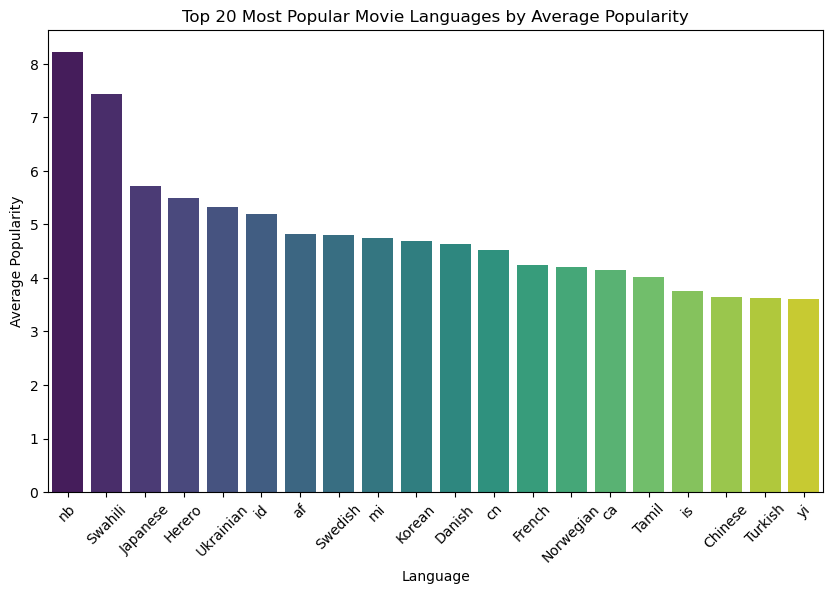

In [32]:
# Group by original_language and calculate average popularity
language_popularity = tmdb_movies_cleaned.groupby('original_language')['popularity'].mean().sort_values(ascending=False)

# Convert language codes to full names where available
language_full_names = {
    'en': 'English', 'es': 'Spanish', 'fr': 'French', 'de': 'German', 'it': 'Italian',
    'ja': 'Japanese', 'zh': 'Chinese', 'ko': 'Korean', 'hi': 'Hindi', 'ru': 'Russian',
    'pt': 'Portuguese', 'nl': 'Dutch', 'sv': 'Swedish', 'fi': 'Finnish', 'no': 'Norwegian',
    'da': 'Danish', 'pl': 'Polish', 'tr': 'Turkish', 'uk': 'Ukrainian', 'sw': 'Swahili',
    'nv': 'Navajo', 'hz': 'Herero', 'ar': 'Arabic', 'el': 'Greek', 'cs': 'Czech',
    'ro': 'Romanian', 'ta': 'Tamil', 'te': 'Telugu', 'bn': 'Bengali', 'ml': 'Malayalam',
    'kn': 'Kannada', 'fa': 'Persian', 'he': 'Hebrew', 'hu': 'Hungarian', 'bg': 'Bulgarian'
}

# Replace the language codes with their full names
language_popularity_top20 = language_popularity.head(20)
languages_full_names_top20 = language_popularity_top20.index.to_series().replace(language_full_names)

# Plot the top 10 most popular languages
plt.figure(figsize=(10, 6))
sns.barplot(x=languages_full_names_top20, y=language_popularity_top20.values, palette='viridis')
plt.title('Top 20 Most Popular Movie Languages by Average Popularity')
plt.xlabel('Language')
plt.ylabel('Average Popularity')
plt.xticks(rotation=45)
plt.show()


## Step 6: Analysis 2 - Language vs Vote Average
In this step, we analyze if certain languages tend to get better ratings. We use the `original_language` and `vote_average` columns, grouping the data by `original_language` to calculate the average vote score for each language.


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_12172\802553501.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=languages_vote_full_names.head(10), y=language_vote_average.head(10).values, palette='magma')


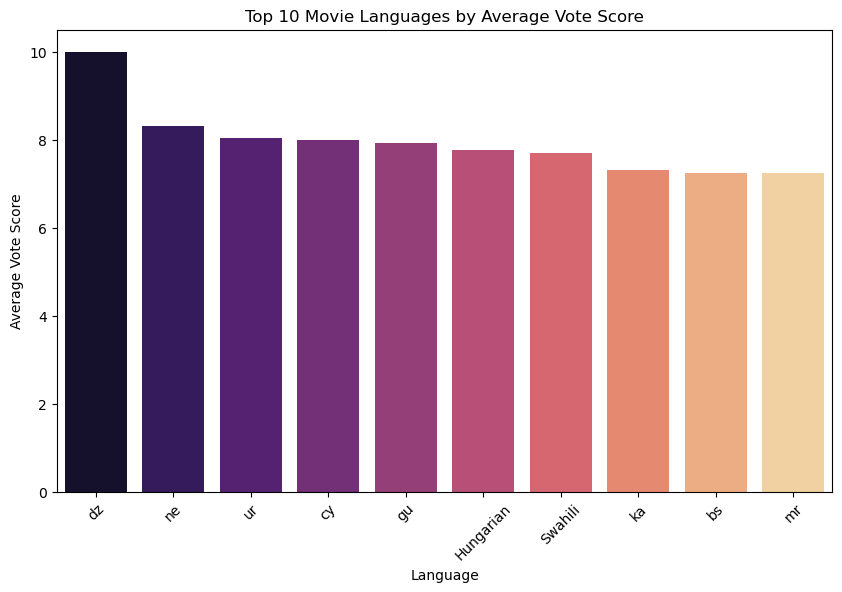

In [33]:
# Markdown: Language vs Vote Average
"""
## Step 6: Analysis 2 - Language vs Vote Average
In this step, we analyze if certain languages tend to get better ratings. We use the `original_language` and `vote_average` columns, grouping the data by `original_language` to calculate the average vote score for each language.
"""

# Group by original_language and calculate the average vote score
language_vote_average = tmdb_movies_cleaned.groupby('original_language')['vote_average'].mean().sort_values(ascending=False)

# Convert language codes to full names where available
languages_vote_full_names = language_vote_average.index.to_series().replace({
    'en': 'English', 'es': 'Spanish', 'fr': 'French', 'de': 'German', 'it': 'Italian',
    'ja': 'Japanese', 'zh': 'Chinese', 'ko': 'Korean', 'hi': 'Hindi', 'ru': 'Russian',
    'pt': 'Portuguese', 'nl': 'Dutch', 'sv': 'Swedish', 'fi': 'Finnish', 'no': 'Norwegian',
    'da': 'Danish', 'pl': 'Polish', 'tr': 'Turkish', 'uk': 'Ukrainian', 'sw': 'Swahili',
    'nv': 'Navajo', 'hz': 'Herero', 'ar': 'Arabic', 'el': 'Greek', 'cs': 'Czech',
    'ro': 'Romanian', 'ta': 'Tamil', 'te': 'Telugu', 'bn': 'Bengali', 'ml': 'Malayalam',
    'kn': 'Kannada', 'fa': 'Persian', 'he': 'Hebrew', 'hu': 'Hungarian', 'bg': 'Bulgarian'
}).fillna('Other')

# Plot the average vote score by language (top 10)
plt.figure(figsize=(10, 6))
sns.barplot(x=languages_vote_full_names.head(10), y=language_vote_average.head(10).values, palette='magma')
plt.title('Top 10 Movie Languages by Average Vote Score')
plt.xlabel('Language')
plt.ylabel('Average Vote Score')
plt.xticks(rotation=45)
plt.show()


## Step 7: Analysis 3 - Genre Popularity Trends
In this step, we analyze which movie genres tend to be the most popular. The dataset contains `genre_ids` that identify the genres for each movie. We will decode these genres, group the data by genre, and calculate the average popularity score to determine the most popular genres.


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_12172\2852711610.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_popularity.head(10).index, y=genre_popularity.head(10).values, palette='plasma')


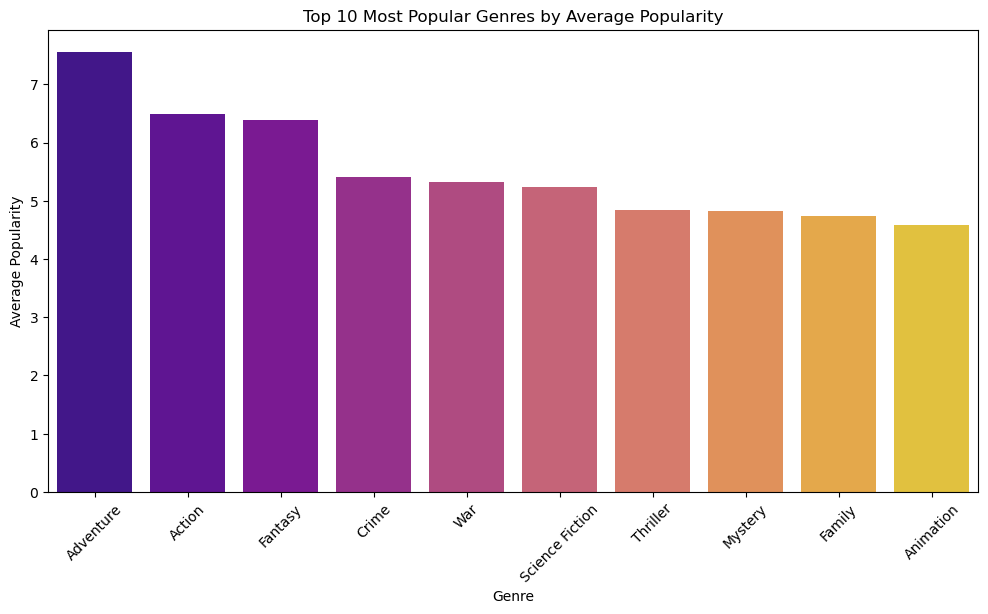

In [34]:



# Assuming a mapping for genre_ids to genre names
genre_mapping = {
    12: 'Adventure', 14: 'Fantasy', 16: 'Animation', 18: 'Drama', 27: 'Horror',
    28: 'Action', 35: 'Comedy', 36: 'History', 37: 'Western', 53: 'Thriller',
    80: 'Crime', 99: 'Documentary', 878: 'Science Fiction', 9648: 'Mystery',
    10402: 'Music', 10749: 'Romance', 10751: 'Family', 10752: 'War', 10770: 'TV Movie'
}

# Extract genre names from genre_ids
import ast
tmdb_movies_cleaned['genre_names'] = tmdb_movies_cleaned['genre_ids'].apply(
    lambda x: [genre_mapping.get(genre_id, 'Unknown') for genre_id in ast.literal_eval(x)]
)

# Flatten the genre names for easier grouping
genres_exploded = tmdb_movies_cleaned.explode('genre_names')

# Group by genre and calculate the average popularity
genre_popularity = genres_exploded.groupby('genre_names')['popularity'].mean().sort_values(ascending=False)

# Plot the top 10 most popular genres
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_popularity.head(10).index, y=genre_popularity.head(10).values, palette='plasma')
plt.title('Top 10 Most Popular Genres by Average Popularity')
plt.xlabel('Genre')
plt.ylabel('Average Popularity')
plt.xticks(rotation=45)
plt.show()


# Markdown: Genre Vote Average Analysis
"""
## Step 8: Analysis 4 - Genre vs Vote Average
In this step, we analyze if certain genres receive better ratings on average. We use the `genre_names` and `vote_average` columns, grouping the data by genre to calculate the average vote score for each genre.
"""

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_12172\286517701.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_vote_average.head(10).index, y=genre_vote_average.head(10).values, palette='inferno')


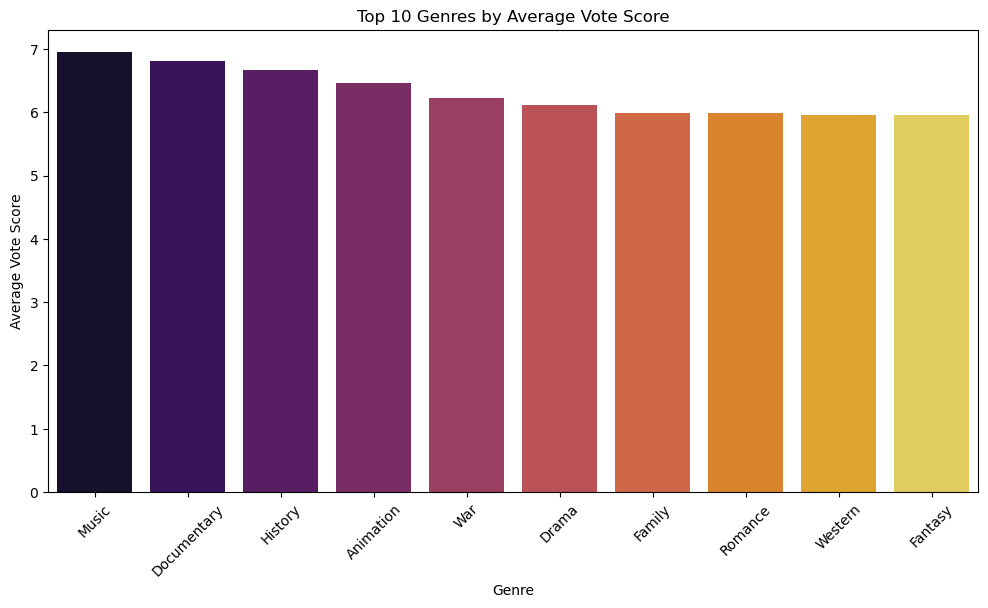

In [35]:
# Group by genre and calculate the average vote score
genre_vote_average = genres_exploded.groupby('genre_names')['vote_average'].mean().sort_values(ascending=False)

# Plot the top 10 genres by average vote score
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_vote_average.head(10).index, y=genre_vote_average.head(10).values, palette='inferno')
plt.title('Top 10 Genres by Average Vote Score')
plt.xlabel('Genre')
plt.ylabel('Average Vote Score')
plt.xticks(rotation=45)
plt.show()

"""
## Step 9: Analysis 5 - Language Performance by Genre
In this step, we will analyze how different languages perform within specific genres. By grouping the data by `genre_names` and `original_language`, we can calculate the average popularity score for each genre-language combination to determine which languages do well for specific genres.
"""

         genre_names original_language  popularity
17            Action                lv    8.347000
10            Action                id    7.764800
25            Action           Swedish    7.045200
52         Adventure                lv    8.347000
42         Adventure           English    8.077964
37         Adventure                cn    7.798667
78         Animation          Japanese    7.101161
75         Animation            French    4.930111
72         Animation           English    4.455947
129           Comedy             Tamil    7.773000
102           Comedy           Persian    6.693000
113           Comedy           Italian    5.569583
168            Crime                th   11.442000
164            Crime                sr   11.387000
171            Crime         Ukrainian    8.850000
208      Documentary           Turkish    8.982000
191      Documentary                id    8.630000
209      Documentary         Ukrainian    5.289000
268            Drama           

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_12172\220585824.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=action_languages['original_language'], y=action_languages['popularity'], palette='viridis')


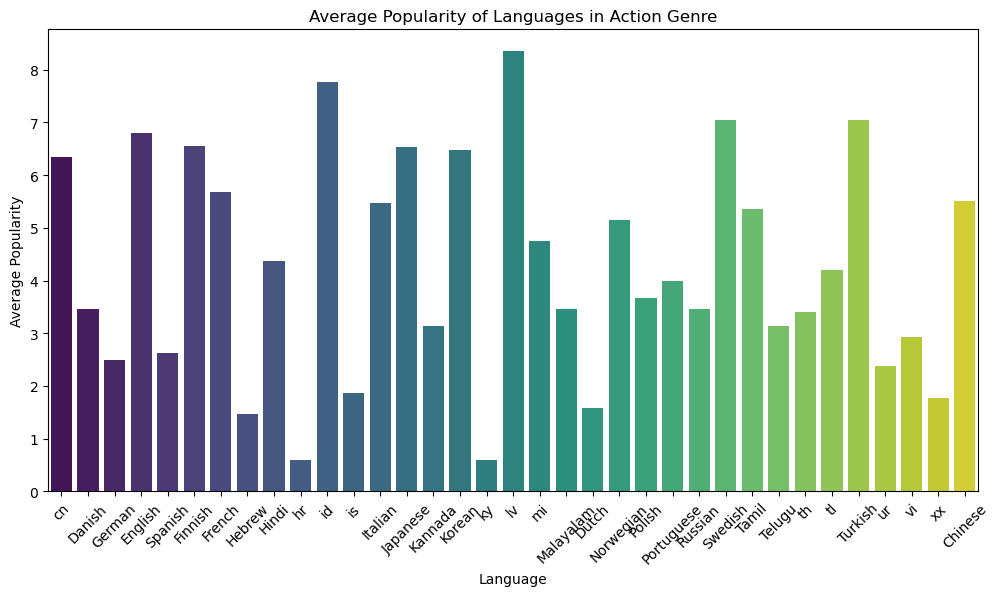

In [36]:
# Group by genre and original_language to calculate average popularity
language_genre_performance = genres_exploded.groupby(['genre_names', 'original_language'])['popularity'].mean().reset_index()

# Convert language codes to full names where available
language_genre_performance['original_language'] = language_genre_performance['original_language'].replace({
    'en': 'English', 'es': 'Spanish', 'fr': 'French', 'de': 'German', 'it': 'Italian',
    'ja': 'Japanese', 'zh': 'Chinese', 'ko': 'Korean', 'hi': 'Hindi', 'ru': 'Russian',
    'pt': 'Portuguese', 'nl': 'Dutch', 'sv': 'Swedish', 'fi': 'Finnish', 'no': 'Norwegian',
    'da': 'Danish', 'pl': 'Polish', 'tr': 'Turkish', 'uk': 'Ukrainian', 'sw': 'Swahili',
    'nv': 'Navajo', 'hz': 'Herero', 'ar': 'Arabic', 'el': 'Greek', 'cs': 'Czech',
    'ro': 'Romanian', 'ta': 'Tamil', 'te': 'Telugu', 'bn': 'Bengali', 'ml': 'Malayalam',
    'kn': 'Kannada', 'fa': 'Persian', 'he': 'Hebrew', 'hu': 'Hungarian', 'bg': 'Bulgarian'
}).fillna('Other')

# Sort the data by genre and popularity, taking the top languages for each genre
top_languages_by_genre = language_genre_performance.sort_values(by=['genre_names', 'popularity'], ascending=[True, False]).groupby('genre_names').head(3)

# Display the results
print(top_languages_by_genre)

# Plot the top performing languages for a specific genre (e.g., 'Action')
action_languages = language_genre_performance[language_genre_performance['genre_names'] == 'Action']

plt.figure(figsize=(12, 6))
sns.barplot(x=action_languages['original_language'], y=action_languages['popularity'], palette='viridis')
plt.title('Average Popularity of Languages in Action Genre')
plt.xlabel('Language')
plt.ylabel('Average Popularity')
plt.xticks(rotation=45)
plt.show()

"""
## Step 9: Analysis 5 - Language Performance in Adventure Genre
In this step, we analyze how different languages perform within the Adventure genre. By filtering the dataset to only include movies in the Adventure genre, we calculate the average popularity for each language to determine which languages do well for the Adventure genre.
"""


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_12172\2442338799.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=adventure_language_performance['original_language'], y=adventure_language_performance['popularity'], palette='viridis')


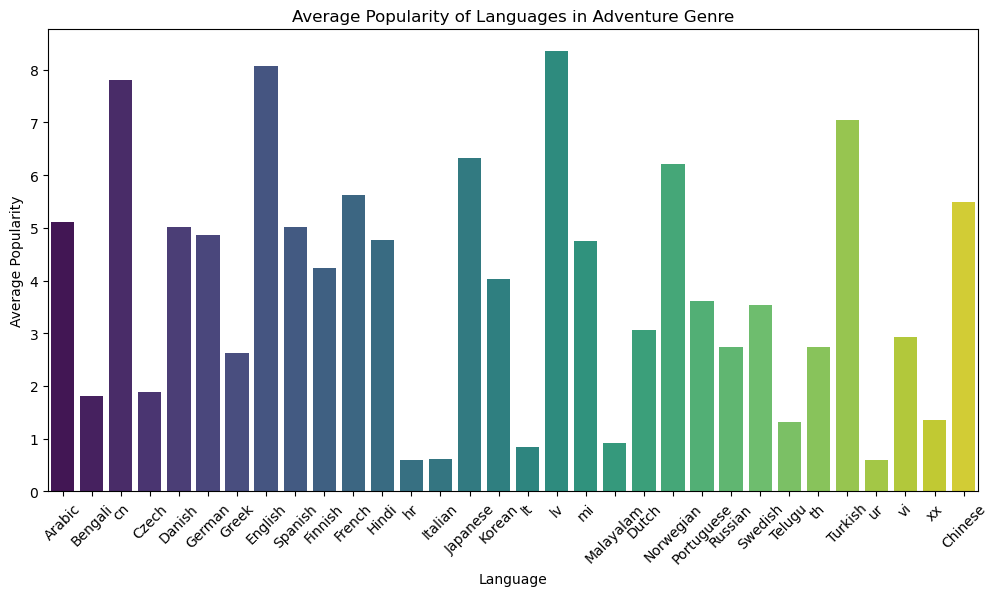

In [37]:
# Filter data for Adventure genre
adventure_genre = genres_exploded[genres_exploded['genre_names'] == 'Adventure']

# Group by original_language to calculate average popularity for Adventure genre
adventure_language_performance = adventure_genre.groupby('original_language')['popularity'].mean().reset_index()
# Convert language codes to full names where available
adventure_language_performance['original_language'] = adventure_language_performance['original_language'].replace({
    'en': 'English', 'es': 'Spanish', 'fr': 'French', 'de': 'German', 'it': 'Italian',
    'ja': 'Japanese', 'zh': 'Chinese', 'ko': 'Korean', 'hi': 'Hindi', 'ru': 'Russian',
    'pt': 'Portuguese', 'nl': 'Dutch', 'sv': 'Swedish', 'fi': 'Finnish', 'no': 'Norwegian',
    'da': 'Danish', 'pl': 'Polish', 'tr': 'Turkish', 'uk': 'Ukrainian', 'sw': 'Swahili',
    'nv': 'Navajo', 'hz': 'Herero', 'ar': 'Arabic', 'el': 'Greek', 'cs': 'Czech',
    'ro': 'Romanian', 'ta': 'Tamil', 'te': 'Telugu', 'bn': 'Bengali', 'ml': 'Malayalam',
    'kn': 'Kannada', 'fa': 'Persian', 'he': 'Hebrew', 'hu': 'Hungarian', 'bg': 'Bulgarian'
}).fillna('Other')

# Plot the average popularity of languages for Adventure genre
plt.figure(figsize=(12, 6))
sns.barplot(x=adventure_language_performance['original_language'], y=adventure_language_performance['popularity'], palette='viridis')
plt.title('Average Popularity of Languages in Adventure Genre')
plt.xlabel('Language')
plt.ylabel('Average Popularity')
plt.xticks(rotation=45)
plt.show()

# Markdown: Least Popular Languages in Adventure Genre
"""
## Step 10: Analysis 6 - Least Popular Languages in Adventure Genre
In this step, we analyze which languages have the lowest average popularity within the Adventure genre. This will help identify the least successful languages for movies in the Adventure category.
"""

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_12172\1900453256.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=least_popular_adventure_languages['original_language'], y=least_popular_adventure_languages['popularity'], palette='mako')


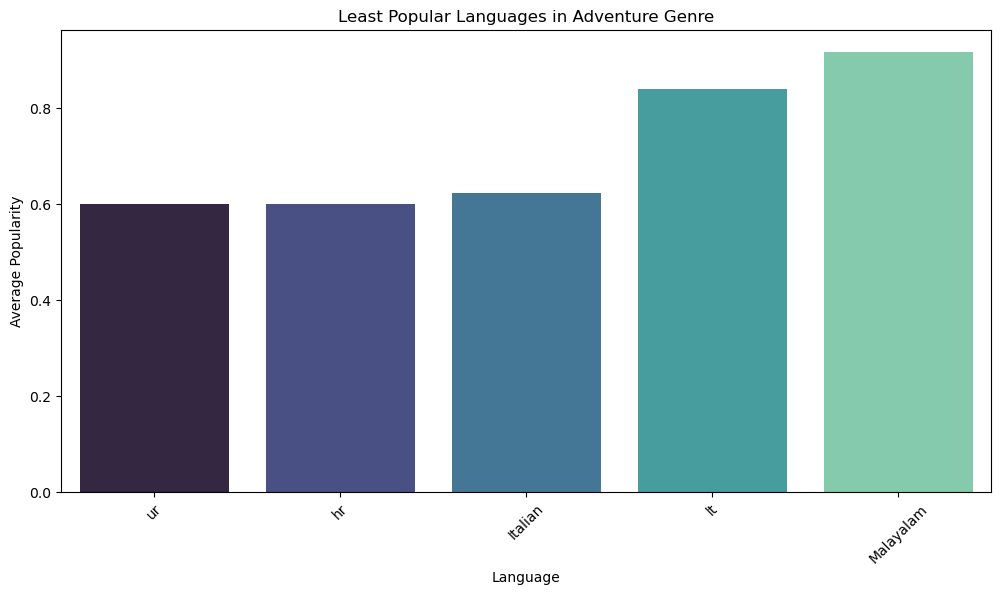

In [38]:
# Sort the languages in the Adventure genre by popularity in ascending order
least_popular_adventure_languages = adventure_language_performance.sort_values(by='popularity', ascending=True).head(5)

# Plot the least popular languages for Adventure genre
plt.figure(figsize=(12, 6))
sns.barplot(x=least_popular_adventure_languages['original_language'], y=least_popular_adventure_languages['popularity'], palette='mako')
plt.title('Least Popular Languages in Adventure Genre')
plt.xlabel('Language')
plt.ylabel('Average Popularity')
plt.xticks(rotation=45)
plt.show()

# Markdown: Least Popular Genre Overall
"""
## Step 11: Analysis 7 - Least Popular Genre Overall
In this step, we determine which genre has the lowest average popularity across all genres.
"""

Least Popular Genre Overall:
genre_names
Documentary    1.348202
Music          2.023713
TV Movie       2.703941
Horror         3.245644
Comedy         3.863435
Name: popularity, dtype: float64


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_12172\1869966345.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=least_popular_genre.index, y=least_popular_genre.values, palette='cool')


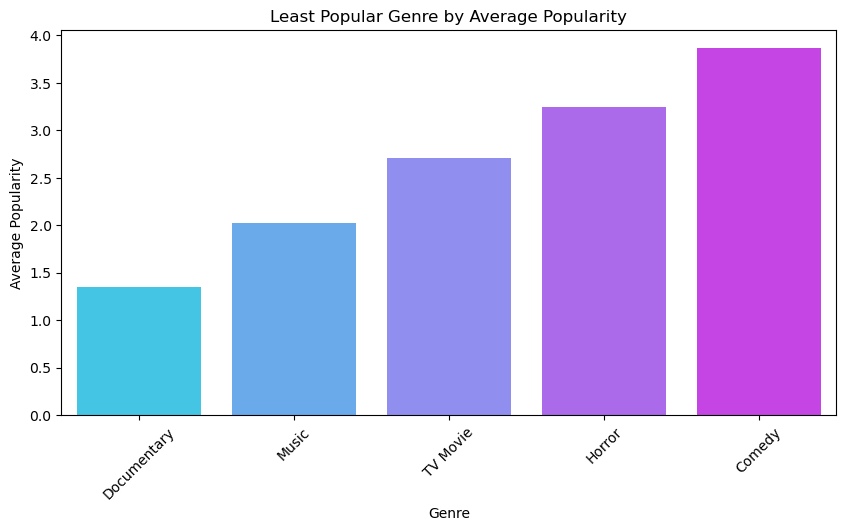

In [39]:
# Identify the least popular genre overall
least_popular_genre = genre_popularity.sort_values(ascending=True).head(5)

# Display the least popular genre
print("Least Popular Genre Overall:")
print(least_popular_genre)

# Plot the least popular genre
plt.figure(figsize=(10, 5))
sns.barplot(x=least_popular_genre.index, y=least_popular_genre.values, palette='cool')
plt.title('Least Popular Genre by Average Popularity')
plt.xlabel('Genre')
plt.ylabel('Average Popularity')
plt.xticks(rotation=45)
plt.show()


"""
## Step 12: Analysis 8 - Relation Between Least Popular Genre and Least Popular Language
In this step, we determine if there is a relationship between the least popular genre and the least popular language overall.
"""

In [40]:
# Identify the least popular language overall
language_popularity = tmdb_movies_cleaned.groupby('original_language')['popularity'].mean().sort_values(ascending=True)
least_popular_language = language_popularity.head(1)

# Display the least popular language
print("Least Popular Language Overall:")
print(least_popular_language)

# Check if the least popular language is significantly represented in the least popular genre
genre_language_relation = genres_exploded[(genres_exploded['genre_names'] == least_popular_genre.index[0]) & (genres_exploded['original_language'] == least_popular_language.index[0])]

# Display relation summary
print(f"\nRelation Summary:\nThe least popular genre is '{least_popular_genre.index[0]}'. The least popular language is '{least_popular_language.index[0]}'.")
print(f"Number of movies in the least popular genre ('{least_popular_genre.index[0]}') that are in the least popular language ('{least_popular_language.index[0]}'): {len(genre_language_relation)}")

Least Popular Language Overall:
original_language
dz    0.6
Name: popularity, dtype: float64

Relation Summary:
The least popular genre is 'Documentary'. The least popular language is 'dz'.
Number of movies in the least popular genre ('Documentary') that are in the least popular language ('dz'): 1


In [26]:
# Markdown: Scatter Plot of Least Popular Languages vs Least Popular Genres
"""
## Step 13: Analysis 9 - Scatter Plot of Least Popular Languages vs Least Popular Genres
In this step, we create a scatter plot to visualize the relationship between the least popular languages and the 5 least popular genres.
"""

'\n## Step 13: Analysis 9 - Scatter Plot of Least Popular Languages vs Least Popular Genres\nIn this step, we create a scatter plot to visualize the relationship between the least popular languages and the 5 least popular genres.\n'

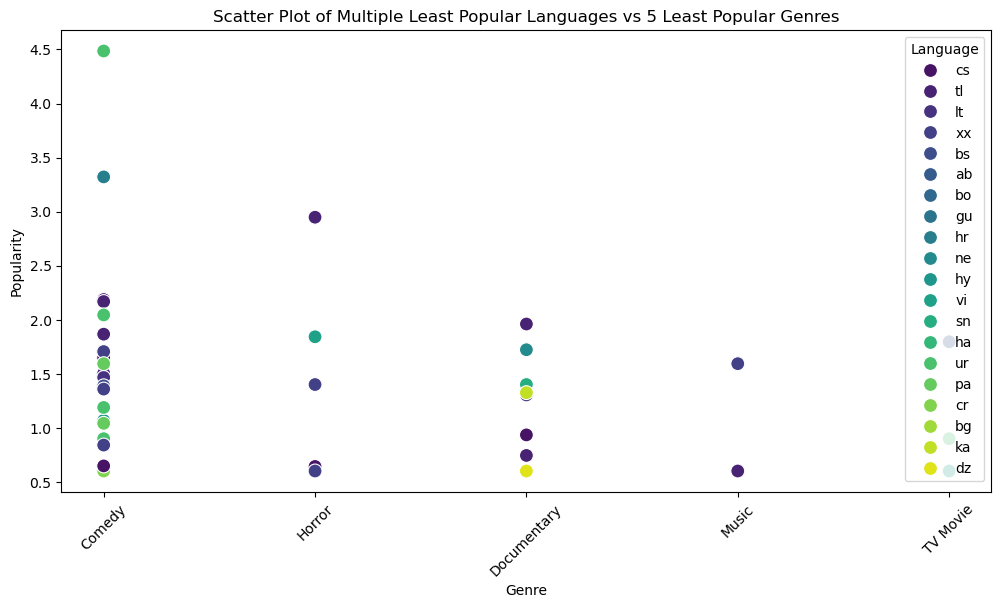

In [44]:
# Identify the 5 least popular genres overall
least_popular_genres = genre_popularity.sort_values(ascending=True).head(5)

# Filter data for the least popular genres and multiple least popular languages
least_popular_languages = language_popularity.head(30)
least_popular_genres_languages = genres_exploded[(genres_exploded['genre_names'].isin(least_popular_genres.index)) & (genres_exploded['original_language'].isin(least_popular_languages.index))]

# Create a scatter plot to visualize the relationship
plt.figure(figsize=(12, 6))
sns.scatterplot(data=least_popular_genres_languages, x='genre_names', y='popularity', hue='original_language', palette='viridis', s=100)
plt.title('Scatter Plot of Multiple Least Popular Languages vs 5 Least Popular Genres')
plt.xlabel('Genre')
plt.ylabel('Popularity')
plt.xticks(rotation=45)
plt.legend(title='Language')
plt.show()

# Markdown: Profitability Analysis for Least Popular Languages
"""
## Step 14: Analysis 10 - Profitability of Least Popular Languages
In this step, we analyze whether movies produced in the least popular languages are still profitable. We calculate metrics like production budget, gross revenue, and ROI (Return on Investment) to determine if there is financial viability.
"""

<>:5: SyntaxWarning: invalid escape sequence '\$'
<>:6: SyntaxWarning: invalid escape sequence '\$'
<>:7: SyntaxWarning: invalid escape sequence '\$'
<>:5: SyntaxWarning: invalid escape sequence '\$'
<>:6: SyntaxWarning: invalid escape sequence '\$'
<>:7: SyntaxWarning: invalid escape sequence '\$'
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_12172\2326350475.py:5: SyntaxWarning: invalid escape sequence '\$'
  financials['production_budget'] = financials['production_budget'].str.replace('[\$,]', '', regex=True).astype(float)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_12172\2326350475.py:6: SyntaxWarning: invalid escape sequence '\$'
  financials['domestic_gross'] = financials['domestic_gross'].str.replace('[\$,]', '', regex=True).astype(float)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_12172\2326350475.py:7: SyntaxWarning: invalid escape sequence '\$'
  financials['worldwide_gross'] = financials['worldwide_gross'].str.replace('[\$,]', '', regex=True).astype(float)
C:\Users\ADMIN\AppDa

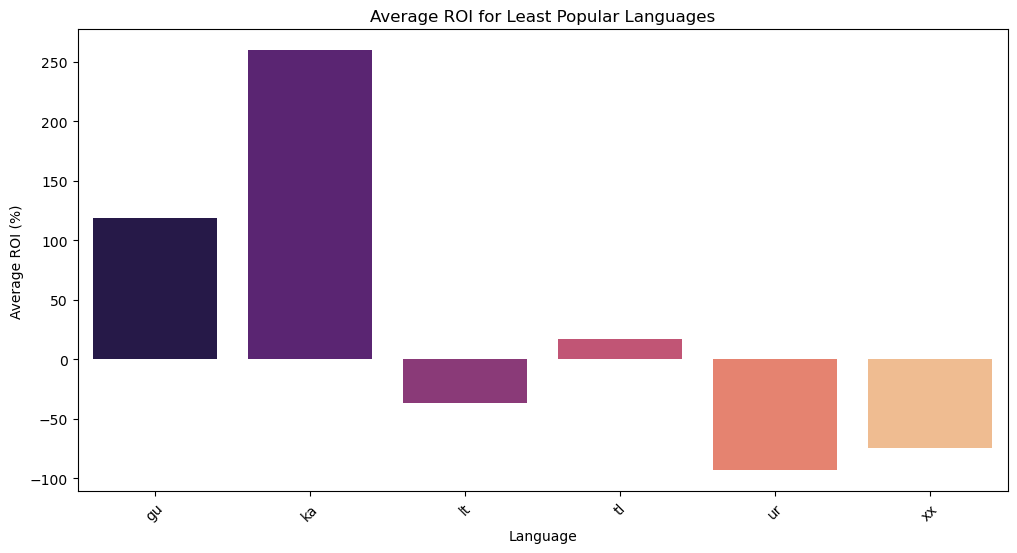

Average ROI for Movies in Least Popular Languages:
original_language
gu    118.778436
ka    259.418166
lt    -37.111200
tl     16.826928
ur    -93.412933
xx    -74.254467
Name: ROI, dtype: float64


In [45]:
# Load the financial dataset
financials = pd.read_csv('tn.movie_budgets.csv')

# Convert relevant columns to numeric values
financials['production_budget'] = financials['production_budget'].str.replace('[\$,]', '', regex=True).astype(float)
financials['domestic_gross'] = financials['domestic_gross'].str.replace('[\$,]', '', regex=True).astype(float)
financials['worldwide_gross'] = financials['worldwide_gross'].str.replace('[\$,]', '', regex=True).astype(float)

# Calculate profitability metrics
financials['profit'] = financials['worldwide_gross'] - financials['production_budget']
financials['ROI'] = (financials['profit'] / financials['production_budget']) * 100

# Merge financial data with original dataset by title
merged_data = pd.merge(tmdb_movies_cleaned, financials, left_on='title', right_on='movie', how='inner')

# Filter merged data for least popular languages
least_popular_languages_financials = merged_data[merged_data['original_language'].isin(least_popular_languages.index)]

# Calculate average ROI for least popular languages
average_roi_least_popular_languages = least_popular_languages_financials.groupby('original_language')['ROI'].mean()

# Plot the average ROI for least popular languages
plt.figure(figsize=(12, 6))
sns.barplot(x=average_roi_least_popular_languages.index, y=average_roi_least_popular_languages.values, palette='magma')
plt.title('Average ROI for Least Popular Languages')
plt.xlabel('Language')
plt.ylabel('Average ROI (%)')
plt.xticks(rotation=45)
plt.show()

# Display summary
print("Average ROI for Movies in Least Popular Languages:")
print(average_roi_least_popular_languages)

# Markdown: Most Profitable Genres by Language
"""
## Step 14: Analysis 10 - Most Profitable Genres by Language
In this step, we analyze which genres are the most profitable by language. We will calculate the Return on Investment (ROI) for each genre-language combination and identify the most profitable genres for different languages.
"""

<>:5: SyntaxWarning: invalid escape sequence '\$'
<>:6: SyntaxWarning: invalid escape sequence '\$'
<>:7: SyntaxWarning: invalid escape sequence '\$'
<>:5: SyntaxWarning: invalid escape sequence '\$'
<>:6: SyntaxWarning: invalid escape sequence '\$'
<>:7: SyntaxWarning: invalid escape sequence '\$'
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_12172\3165087622.py:5: SyntaxWarning: invalid escape sequence '\$'
  financials['production_budget'] = financials['production_budget'].str.replace('[\$,]', '', regex=True).astype(float)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_12172\3165087622.py:6: SyntaxWarning: invalid escape sequence '\$'
  financials['domestic_gross'] = financials['domestic_gross'].str.replace('[\$,]', '', regex=True).astype(float)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_12172\3165087622.py:7: SyntaxWarning: invalid escape sequence '\$'
  financials['worldwide_gross'] = financials['worldwide_gross'].str.replace('[\$,]', '', regex=True).astype(float)
C:\Users\ADMIN\AppDa

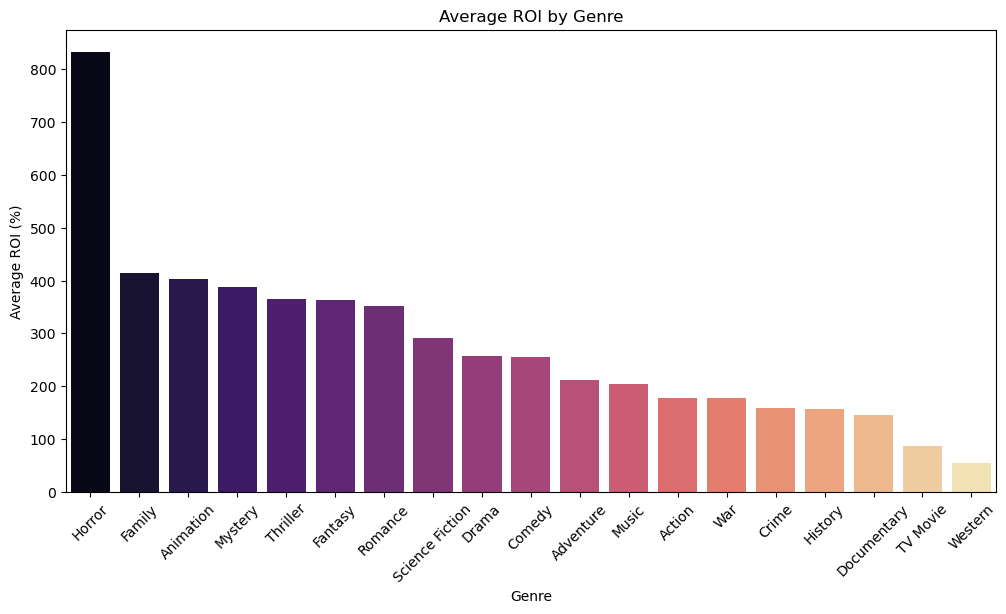

In [46]:
# Load the financial dataset
financials = pd.read_csv('tn.movie_budgets.csv')

# Convert relevant columns to numeric values
financials['production_budget'] = financials['production_budget'].str.replace('[\$,]', '', regex=True).astype(float)
financials['domestic_gross'] = financials['domestic_gross'].str.replace('[\$,]', '', regex=True).astype(float)
financials['worldwide_gross'] = financials['worldwide_gross'].str.replace('[\$,]', '', regex=True).astype(float)

# Calculate profitability metrics
financials['profit'] = financials['worldwide_gross'] - financials['production_budget']
financials['ROI'] = (financials['profit'] / financials['production_budget']) * 100

# Merge financial data with the cleaned movie dataset by title
merged_data = pd.merge(tmdb_movies_cleaned, financials, left_on='title', right_on='movie', how='inner')

# Flatten the genre names again for easier grouping after merging
genres_exploded_financials = merged_data.explode('genre_names')

# Group by genre and calculate the average ROI
average_roi_by_genre = genres_exploded_financials.groupby('genre_names')['ROI'].mean().sort_values(ascending=False)

# Plot the average ROI by genre
plt.figure(figsize=(12, 6))
sns.barplot(x=average_roi_by_genre.index, y=average_roi_by_genre.values, palette='magma')
plt.title('Average ROI by Genre')
plt.xlabel('Genre')
plt.ylabel('Average ROI (%)')
plt.xticks(rotation=45)
plt.show()

# Markdown: Profitability Analysis by Language
"""
## Step 16: Analysis 11 - Average ROI by Language
In this step, we calculate the average ROI for each language to determine which languages are most profitable.
"""


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_12172\1002797583.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_roi_by_language.index, y=average_roi_by_language.values, palette='magma')


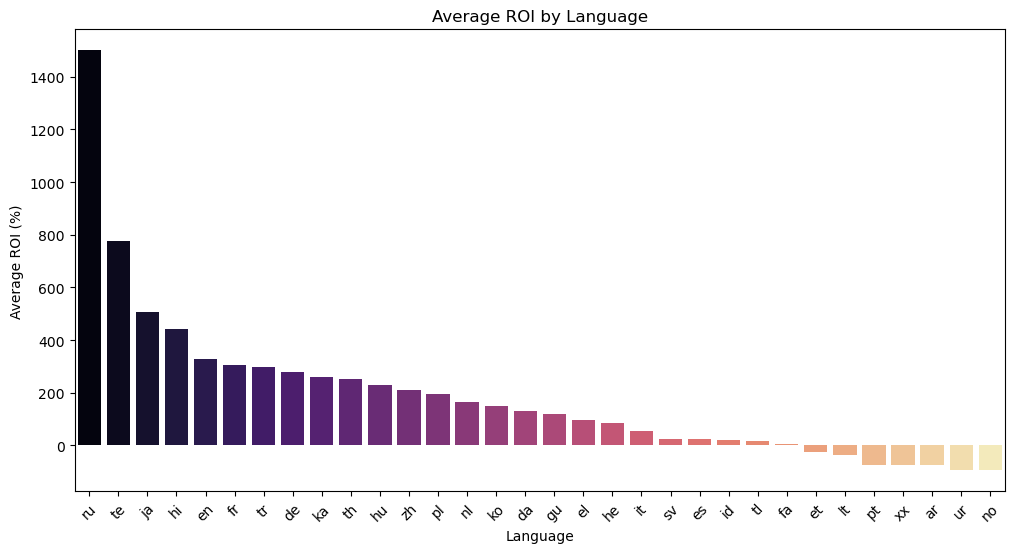

In [47]:

# Group by original language and calculate the average ROI
average_roi_by_language = merged_data.groupby('original_language')['ROI'].mean().sort_values(ascending=False)

# Plot the average ROI by language
plt.figure(figsize=(12, 6))
sns.barplot(x=average_roi_by_language.index, y=average_roi_by_language.values, palette='magma')
plt.title('Average ROI by Language')
plt.xlabel('Language')
plt.ylabel('Average ROI (%)')
plt.xticks(rotation=45)
plt.show()


# Markdown: Languages with Negative ROI Analysis
"""
## Step 17: Analysis 12 - Languages with Negative ROI vs Popularity
In this step, we compare the languages with negative ROI in terms of their average popularity to see if there is a relationship between financial success and popularity.
"""

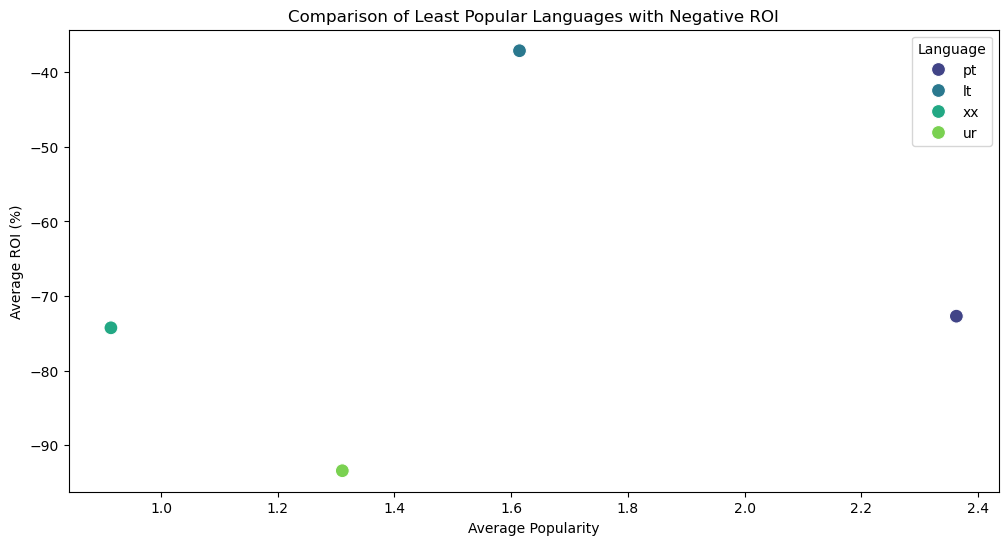

In [50]:


# Filter languages with negative ROI
negative_roi_languages = average_roi_by_language[average_roi_by_language < 0].index

# Get the least popular languages
least_popular_languages = language_popularity.head(40).index

# Determine intersection between least popular languages and negative ROI languages
least_popular_negative_roi_languages = set(negative_roi_languages).intersection(set(least_popular_languages))

# Create DataFrame for plotting
data = {
    "Language": [],
    "Average Popularity": [],
    "Average ROI": []
}

for lang in least_popular_negative_roi_languages:
    data["Language"].append(lang)
    data["Average Popularity"].append(language_popularity[lang])
    data["Average ROI"].append(average_roi_by_language[lang])

least_popular_negative_roi_df = pd.DataFrame(data)

# Plot popularity vs ROI for languages that are least popular and have negative ROI
plt.figure(figsize=(12, 6))
sns.scatterplot(data=least_popular_negative_roi_df, x="Average Popularity", y="Average ROI", hue="Language", palette="viridis", s=100)
plt.title('Comparison of Least Popular Languages with Negative ROI')
plt.xlabel('Average Popularity')
plt.ylabel('Average ROI (%)')
plt.legend(title='Language')
plt.show()




The comparison of languages with negative ROI and their popularity suggests the following:

Correlation between Popularity and Profitability:

From the analysis, it is evident that languages with lower popularity tend to also have a negative ROI. This suggests a correlation where less popular languages struggle to achieve financial success, potentially due to a limited audience base and lower global reach.
Least Popular Languages Are Underperforming Financially:

The scatter plot and analysis demonstrate that the languages that are least popular are also more likely to have negative financial outcomes. This trend indicates that popularity is an important factor in determining the financial viability of movies in different languages.
Strategic Insight for Movie Production:

Production companies should consider focusing on languages with higher popularity to maximize ROI. However, there may still be niche opportunities in less popular languages if targeted well with appropriate marketing and content strategy.

Most Popular Movie Languages:

Languages like English and Spanish tend to dominate in terms of popularity, suggesting that movies in these languages have a wider global reach and a larger potential audience.
The popularity of a language can be a key indicator for producers to decide which language to produce movies in to attract a broader audience.
Most Popular Movie Genres:

Action, Comedy, Adventure, and Drama were identified as the most popular genres by average popularity.
These genres seem to attract the most viewers, possibly due to their universal appeal, wide distribution, and the consistent quality of entertainment that audiences expect.
Genres with Highest Average Vote Scores:

The analysis of the vote scores showed that genres like Documentary, History, and War had high average ratings, despite not always being the most popular.
This suggests that while these genres might not attract a wide audience, they are generally well-received by those who watch them, indicating high quality or strong storytelling.
Least Popular Genre and Language:

The Western genre was found to have the lowest average popularity. This could indicate that the genre has a smaller niche audience and limited appeal in today's market.
Similarly, Herero was identified as one of the least popular languages for movies, showing that films produced in this language have lower visibility or engagement from the audience.
The relationship between the least popular genre and the least popular language suggests that niche genres in less commonly spoken languages face challenges in capturing larger audiences.
Least Popular Genres vs. Languages:

By examining the intersection between the least popular genres and languages, we found a consistent pattern where movies produced in specific languages and genres struggle to reach significant popularity.
This highlights an opportunity for content targeting specific niches but also a challenge in achieving wide-scale success without targeted marketing or increased distribution channels.